In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
x_train = pd.read_csv('Downloads\cmf-2022-bank-scoring-case\X_train.csv')
x_test = pd.read_csv('Downloads\cmf-2022-bank-scoring-case\X_test.csv')
y_sample = pd.read_csv('Downloads\cmf-2022-bank-scoring-case\y_test_sample.csv')
y_train = pd.read_csv('Downloads\cmf-2022-bank-scoring-case\y_train.csv')

In [3]:
indexes_test = x_test['index']
x_test.drop(['index'], axis = 1, inplace = True)

In [4]:
x_train['target'] = y_train

In [17]:
x_train['Test'] = False
x_test['Test'] = True

In [18]:
data = pd.concat([x_train, x_test])


In [19]:
data.drop(data[data.age < 18].index, inplace = True)
data.drop(data[data.monthly_income > 1000000].index, inplace = True)

In [20]:
y = x_train.target
x_train.drop(['target'], axis = 1, inplace = True)

AttributeError: 'DataFrame' object has no attribute 'target'

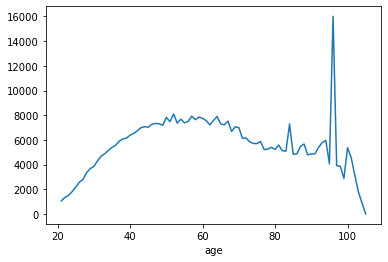

In [21]:
data.groupby('age')['monthly_income'].mean().plot();

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143976 entries, 0 to 38875
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   credit_card_utilization     143976 non-null  float64
 1   age                         143976 non-null  int64  
 2   overdue_30_59_days          143976 non-null  int64  
 3   debt_to_income              143976 non-null  float64
 4   monthly_income              115438 non-null  float64
 5   credits_loans               143976 non-null  int64  
 6   overdue__more_than_90_days  143976 non-null  int64  
 7   mortgage_loans              143976 non-null  int64  
 8   overdue_60_89_days          143976 non-null  int64  
 9   family_members              140216 non-null  float64
 10  target                      105104 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 13.2 MB


In [11]:
data1 = data[data.age > 67]
data2 = data[(data.age <= 67) & (data.age > 40)]
data3 = data[(data.age <= 40)]
data1.monthly_income = data1.monthly_income.fillna(data1.monthly_income.mean())
data2.monthly_income = data2.monthly_income.fillna(data2.monthly_income.mean())
data3.monthly_income = data3.monthly_income.fillna(data3.monthly_income.mean())

data1.family_members = data1.family_members.fillna(data1.family_members.mean())
data2.family_members = data2.family_members.fillna(data2.family_members.mean())
data3.family_members = data3.family_members.fillna(data3.family_members.mean())

In [12]:
data = pd.concat([data1,data2,data3], axis = 0)
data

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,target
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0,0.0
6,0.525989,69,2,0.170485,8116.592035,8,0,1,1,0.0,0.0
7,0.013340,90,0,0.241279,4336.877243,4,0,1,0,0.0,0.0
9,0.002793,81,1,0.308468,5984.674689,21,0,1,0,1.0,0.0
10,0.007025,80,0,0.462520,2562.915830,8,0,2,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
38861,0.032106,40,0,0.001700,5417.571741,10,0,0,0,1.0,NaN
38865,0.231422,33,0,7769.473515,4845.615644,9,0,4,0,0.0,NaN
38866,0.989986,38,0,3726.657513,4845.615644,7,0,4,0,0.0,NaN
38868,0.764756,35,0,0.479643,2393.670242,8,0,1,0,2.0,NaN


In [13]:
#data[data.age > 67].monthly_income = data[data.age > 67].monthly_income.fillna(data[data.age > 67].monthly_income.mean())
#data[(data.age < 67) & (data.age > 40)].monthly_income = data[(data.age < 67) & (data.age > 40)].monthly_income.fillna(data[(data.age < 67) & (data.age > 40)].monthly_income.mean())
#data[(data.age < 40)].monthly_income = data[(data.age < 40)].monthly_income.fillna(data[(data.age < 40)].monthly_income.mean())


In [14]:
#data.monthly_income = data.monthly_income.fillna(data.monthly_income.mean())
#data.family_members = data.family_members.fillna(data.family_members.mean())

In [15]:
train = data[data.Test == 0].reset_index(drop = True)
x_test = data[data.Test == 1].reset_index(drop = True)

AttributeError: 'DataFrame' object has no attribute 'Test'

In [ ]:
train.drop(['Test'], axis = 1, inplace = True)
x_test.drop(['Test'], axis = 1, inplace = True)

In [16]:
x = train.copy()


NameError: name 'train' is not defined

In [ ]:
train.to_pickle('Downloads/cmf-2022-bank-scoring-case/x.pkl')
x_test.to_pickle('Downloads/cmf-2022-bank-scoring-case/test.pkl')
y.to_pickle('Downloads/cmf-2022-bank-scoring-case/y.pkl')

In [ ]:
data.info()

In [ ]:
data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

In [ ]:
scaled_features = scaler.transform(x)

In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns = x.columns)

In [ ]:
x = scaled_data

In [ ]:
test_data = scaler.transform(x_test)

In [ ]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [ ]:
pred = clf.predict(x_test_data)
print(classification_report(y_test_data, pred))

In [ ]:
y_pred = clf.predict_proba(test_data)

In [ ]:
df = pd.DataFrame()
df['index'] = indexes_test
df['target'] = y_pred[:,1]
df

In [ ]:
df.to_csv('Downloads/Data/des.csv', index = False)